In [7]:

import numpy as np
import matplotlib.pyplot as plt

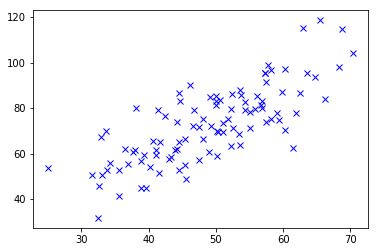

In [8]:
data = np.genfromtxt("../l1_data.csv", delimiter=",")
plt.plot(data[:,0], data[:, 1], 'bx')
plt.show()

In [28]:
def split(data):
    rows, columns = data.shape
    return (data[:,0:columns - 1], data[:, columns - 1])

def bias(x):
    count, col = x.shape
    return np.column_stack((np.ones(count), x))     

def train(data, lr=0.0001, iter=30,rr=2):
    x, y = split(data)
    bias_ = bias(x)
    thetha = np.zeros(bias_.shape[1])
    costs = np.zeros(iter)   
    for i in range(iter):
        costs[i] = (1 / (2*x.shape[0])) * np.sum((np.sum(np.transpose(thetha) * bias_, axis = 1) - y) ** 2) + (rr / x.shape[0])* np.sum(thetha[1:] ** 2)
        thetha_new = thetha - lr * ( 1/ (x.shape[0])) * np.sum((np.sum(np.transpose(thetha) * bias_, axis = 1) - y) * bias_.transpose(), axis = 1)
    
        thetha_reg = thetha * (rr / x.shape[0])
        thetha_reg[0] = 0
        thetha = thetha_new + thetha_reg
    return thetha, costs

In [29]:
def plot_data(data, predicted, costs):
    x, y = data
    fig, (g1, g2) = plt.subplots(nrows=2, ncols=1)
    g1.plot(x, y, 'bo', markersize=2)
    g1.plot(x, predicted, 'ro', markersize=2)
    g1.axis([x.min() - x.mean() / 10, x.max() + x.mean()/ 10, y.min() - y.mean()/ 10, y.max() + y.mean()/ 10])
    g2.plot(costs)
    plt.show()

    
def predict(theta, x):
    m, features = x.shape
    x_bias = np.column_stack((np.ones(m), x))
    y = np.sum(np.transpose(theta) * x_bias, axis=1)
    return y

In [30]:
thetha, costs = train(data)

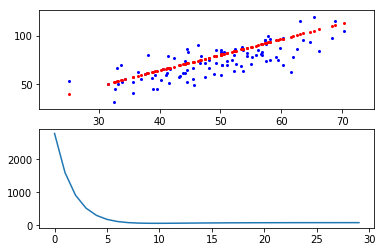

In [31]:
x, y = split(data)
plot_data((x, y), predict(thetha, x), costs)

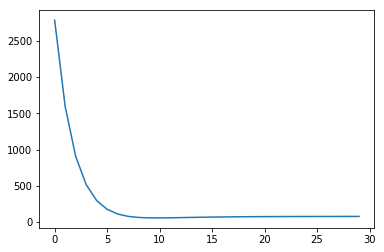

[ 2782.55391724  1593.13617553   907.40644158   516.13414534   296.10882812
   174.97517168   110.39816533    77.72901557    62.71140629    57.17452134
    56.49453147    58.10210658    60.60780099    63.29175885    65.80773254
    68.01278096    69.870366      71.3960767     72.62792413    73.61065182
    74.38792435    74.99885036    75.47681408    75.84947267    76.13928778
    76.36425228    76.53863879    76.67368848    76.7782086     76.85907246]


In [32]:
plt.plot(costs)
plt.show()
print(costs)